# Linear Regression Delivery and Sorting Time

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.shape

(21, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Outliers using boxplot

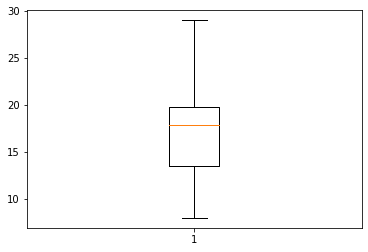

In [7]:
plt.boxplot(df["Delivery Time"])
plt.show()

C:\Users\Varsha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

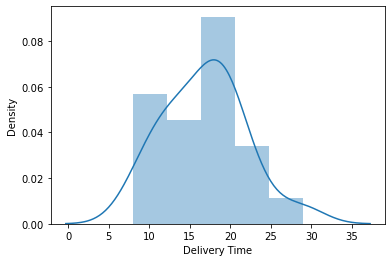

In [8]:
sns.distplot(df["Delivery Time"])

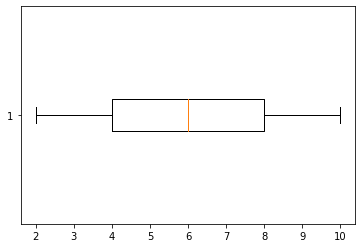

In [9]:
plt.boxplot(df["Sorting Time"],vert=False)
plt.show()

C:\Users\Varsha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

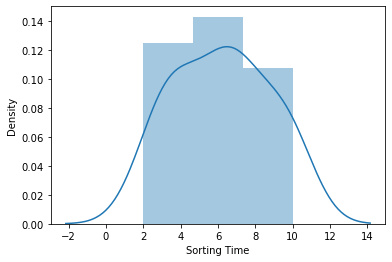

In [10]:
sns.distplot(df["Sorting Time"])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

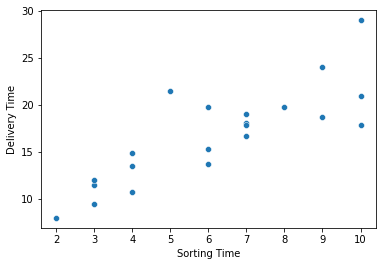

In [11]:
sns.scatterplot(x=df["Sorting Time"],y=df["Delivery Time"])

In [12]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [13]:
# Positive correlation between delivery time and sorting time

In [14]:
df1=df.rename(columns= {"Delivery Time":"DT", "Sorting Time":"ST"})
df1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
import statsmodels.formula.api as smf
model=smf.ols("DT~ST",data=df1).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

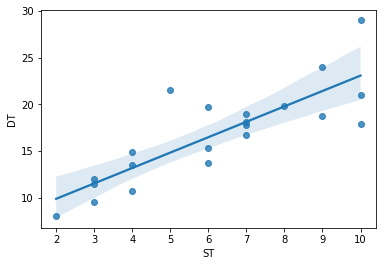

In [16]:
sns.regplot(x='ST',y='DT',data=df1)

In [17]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [18]:
print(model.pvalues)

Intercept    0.001147
ST           0.000004
dtype: float64


In [19]:
model.rsquared

0.6822714748417231

In [20]:
#model is aceptable but not best fit as (r^2)>0.65

In [24]:
#predict for 6 sorting time
newdata=pd.Series([20])

In [25]:
data_pred=pd.DataFrame(newdata,columns=['ST'])
data_pred

,ST
0,20


In [26]:
model.predict(data_pred)

0    39.563132
dtype: float64